## dir setup

In [1]:
from dotenv import load_dotenv, find_dotenv
import os

this_file_path = os.path.dirname(os.path.abspath("__file__"))
# if script (not notebook)...
# project_dir = os.path.join(os.path.dirname(__file__), os.pardir)

# project directory
project_dir = os.path.join(this_file_path, os.pardir)

# find .env automagically by walking up directories until it's found
dotenv_path = find_dotenv()

# load up the entries as environment variables
load_dotenv(dotenv_path)

True

In [2]:
raw_data_dir = os.path.join(project_dir, os.environ.get("RAW_DATA_DIR"))
processed_data_dir = os.path.join(project_dir, os.environ.get("PROCESSED_DATA_DIR"))
figures_dir = os.path.join(project_dir, os.environ.get("FIGURES_DIR"))
reports_dir = os.path.join(project_dir, os.environ.get("REPORTS_DIR"))
cv_dir = os.path.join(project_dir, os.environ.get("CV_DIR"))

In [3]:
# import numpy as np
# from datetime import datetime

In [4]:
import pandas as pd
# pd.set_option('max_rows', None)
pd.set_option('max_columns', None)
# pd.options.mode.chained_assignment = None  # default='warn'

In [5]:
import seaborn as sns

In [6]:
# from tqdm import tqdm
# tqdm.pandas()

In [7]:
import sys
sys.path.insert(0, '..')

In [8]:
from src.features import *

In [8]:
fns = os.listdir(cv_dir)
fns

['pred__alpha_val_200__buy_weight_200__factors_128__iterations_15__regularization_0.01.csv',
 '.DS_Store',
 'pred__alpha_val_200__buy_weight_100__factors_256__iterations_15__regularization_0.01.csv',
 'pred__alpha_val_200__buy_weight_100__factors_128__iterations_15__regularization_0.01.csv',
 'pred__alpha_val_200__buy_weight_200__factors_256__iterations_15__regularization_0.01.csv']

In [12]:
pred = pd.read_csv(os.path.join(cv_dir, fns[3]), index_col = 0)

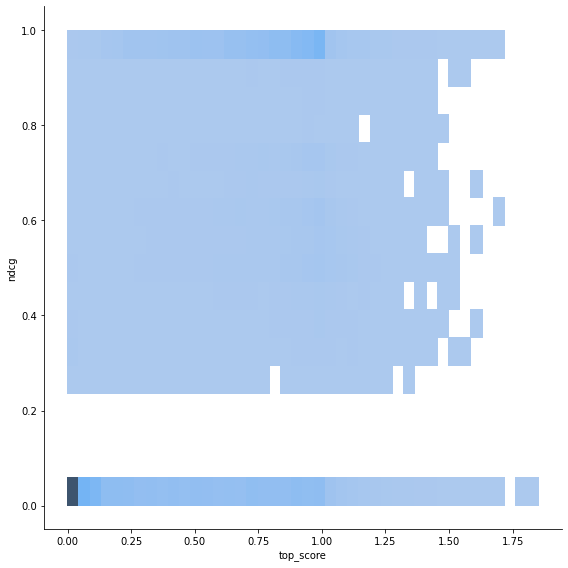

In [31]:
sns.displot(data = pred, x = 'top_score', y = 'ndcg', height = 8, );

<AxesSubplot:xlabel='top_score', ylabel='ndcg'>

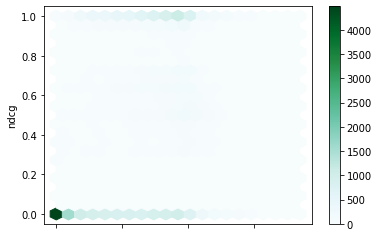

In [83]:
pred.plot.hexbin(x = 'top_score', y = 'ndcg', gridsize = 20)

In [36]:
train_fn = 'train_dataset.pkl'
test_fn = 'test_dataset.pkl'
train, test = read_processed(train_fn, test_fn)

In [44]:
preds_0 = pred[pred.ndcg == 0]

In [50]:
train.event_type = train.event_type.fillna('buy')

In [51]:
train_e = train.groupby('seq').event_type.value_counts().unstack().reset_index()

In [54]:
pred = pd.merge(pred, train_e, how = 'left')

In [63]:
pred['ndcg_cut'] = pd.cut(pred.ndcg, bins = np.arange(0, 1.01, 0.1), right = False)

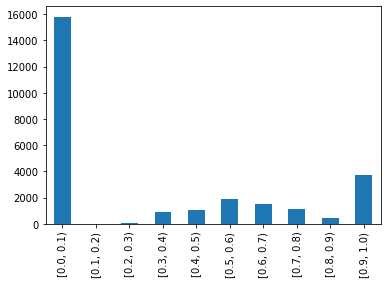

In [78]:
pred.ndcg_cut.value_counts().sort_index().plot(kind = 'bar');

<AxesSubplot:xlabel='ndcg_cut'>

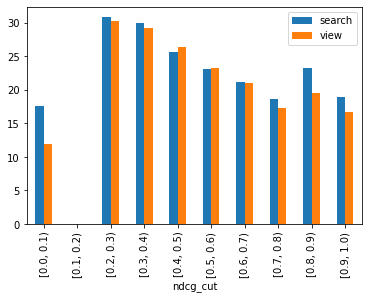

In [65]:
pred.groupby('ndcg_cut')[['search', 'view']].mean().plot(kind = 'bar')

In [69]:
pred['top_score_cut'] = pd.cut(pred.top_score, bins = 10)

<AxesSubplot:xlabel='top_score_cut'>

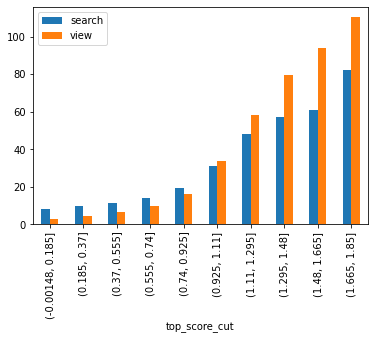

In [70]:
pred.groupby('top_score_cut')[['search', 'view']].mean().plot(kind = 'bar')